<a href="https://colab.research.google.com/github/rsmecking/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/Ryan_Mecking_LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

In [6]:
# True Positive Rate 100%
prob_drunk_given_positive = 1
# Prior Probability (1/1000)
prob_drunk_prior = 1/1000
# False Positive Rate 8%
false_positive_rate = .08
# Complement probability of p_user (1 - p_user)
true_positive_rate = 1 - prob_drunk_prior

print('Probability Positive Drunk', prob_drunk_given_positive)
print('Probability Drunk', prob_drunk_prior)
print('Probability Positive Given Non-Drunk', false_positive_rate)
print('Probability Non-Drunk', true_positive_rate)

Probability Positive Drunk 1
Probability Drunk 0.001
Probability Positive Given Non-Drunk 0.08
Probability Non-Drunk 0.999


In [7]:
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):
  counts = 0
  prob_drunk_prior_one = 0
  prob_drunk_prior_two = 0
  while(counts < 4):
    counts = counts + 1
    print ('run', counts)
    prob_drunk_non_user = 1 - prob_drunk_prior
    prob_drunk_prior = (true_positive_rate*prob_drunk_prior) / ((true_positive_rate*prob_drunk_prior) + (false_positive_rate*prob_drunk_non_user))
    if counts == 1:
      prob_drunk_prior_one = prob_drunk_prior
    elif counts == 2:
      prob_drunk_prior_two = prob_drunk_prior
  return print('Test one:', prob_drunk_prior_one, '\nTest two:', prob_drunk_prior_two, '\nOver 95% positive tests required', prob_drunk_prior, counts, 'tests')

prob_drunk_given_positive(1/1000, .08, 1)

run 1
run 2
run 3
run 4
Test one: 0.012357884330202669 
Test two: 0.13525210993291495 
Over 95% positive tests required 0.9606895076105054 4 tests


In [0]:
# drunk_probability = (prob_drunk_given_positive*prob_drunk_prior) / ((prob_drunk_given_positive*prob_drunk_prior) + (false_positive_rate*true_positive_rate))

# The probabiltiy of a person who tests positive actually being a drunk:
# print("Drunk Probability", drunk_probability)

In [0]:
#two tests
# drunk_probability = (prob_drunk_given_positive*drunk_probability ) / ((prob_drunk_given_positive*prob_drunk_prior) + (false_positive_rate*true_positive_rate))
# print("Drunk Probability", drunk_probability)

In [0]:
#It takes 4 tests to reach over a 95% probability

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

In [11]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t
df = pd.read_csv('house-votes-84.data', 
                 header=None,
                 names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])
df = df.replace({'?':np.NaN, 'n':0, 'y':1})
rep = df[df.party == "republican"]
print(df.shape)

--2020-01-23 14:56:28--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2020-01-23 14:56:28 (624 KB/s) - ‘house-votes-84.data’ saved [18171/18171]

(435, 17)


In [0]:
#confidence interval equation
def confidence_interval(data, confidence=.95):
  n = len(data)
  mean = sum(data)/n
  data = np.array(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n-1)
  return (mean, mean-interval, mean+interval)

In [0]:
#rep['education'].value_counts()

In [14]:
#CI
# education = rep['education'].dropna()
# n = len(education)
# education_mean = education.mean()
# sample_std = education.std()
# std_err = sample_std/np.sqrt(.95)

# CI_education = stats.t.interval(.95, n-1, loc=education_mean, scale=std_err)

# print("education mean:", education_mean)
# CI_education

education mean: 0.8709677419354839


(0.1893070066902821, 1.5526284771806855)

In [22]:
mean, lower, upper = confidence_interval(rep['education'].dropna())
mean, lower, upper

(0.8709677419354839, 0.8176017935029393, 0.9243336903680285)

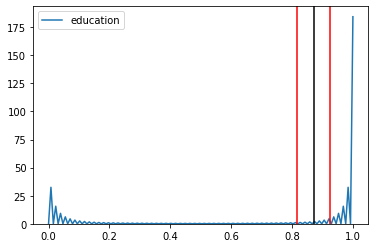

In [36]:
sns.kdeplot(rep['education'].dropna())
plt.axvline(x=upper, color='red')
plt.axvline(x=lower, color='red')
plt.axvline(x=mean, color='k');

In [0]:
# from random import choice
# n = len(rep['education'])
# sample_means = list()
# for x in range(1000):
#   resample = list()
# for y in range(n-1):
#   resample.append(choice(rep['education']))
# sample_means.append((sum(resample) / len(resample)))

In [19]:
#Bayesian
bayesian_confidence_interval, _, _ = stats.bayes_mvs(education, alpha=.95)
print(bayesian_confidence_interval)

Mean(statistic=0.8709677419354839, minmax=(0.8176017935029393, 0.9243336903680285))


In [0]:
fig, ax = plt.subplots()
ax.bar(x=0, height=bayesian_confidence_interval.statistic[0], yerr=bayesian_confidence_interval[2]-bayesian_confidence_interval[1]);

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
# TODO - code!

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!